# Assignment Kennis en Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Joris| secret |
|Chaim| secret |
|Maarten| secret |
|  | |

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>

# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 

In [45]:

!pip install rdflib
# See https://rdflib.readthedocs.io/en/stable/gettingstarted.html
from rdflib import Graph, Namespace, BNode, Literal, RDF, FOAF, URIRef
from networkx import nx

# Tutorial: NetworkX & RDF database

In deze tutorial gaan we een NetworkX Graph (inclusief node-attributes) omzetten naar een RDFLib database. Daarna gaan we met deze RDF databases meerdere SPARQL queries schrijven om relaties op te halen zoals vaders, moeders, broers of zussen. Als laatste laten we zien hoe je dit proces weer kunt omdraaien, door een lijst van triples (RDF Database) weer een NetworkX Graph te maken. 

### Stap 0. NetworkX netwerk definiëren & visualiseren
### Stap 1. RDF Netwerk maken
- 1.1 RDF Namespaces & Graph maken 
- 1.2 Nodes (attributes) toevoegen
- 1.3 Edges (relaties) toevoegen

### Stap 2. SPARQL Queries voor gedefineerde relaties
- 2.1 Ouders: Vaders & Moeders
- 2.2 Broers & Zussen
- 2.3 Opa's & Oma's
- 2.4 Ooms & Tantes
- 2.5 Neven & Nichten

### Stap 3. Van RDFLib Triples naar NetworkX 
<hr>
<br>

## Stap 0. NetworkX netwerk definiëren & visualiseren
<hr>
We beginnen met het definiëren van een NetworkX DiGraph met daarin 19 nodes. Iedere node in dit netwerk is een persoon uit de familie van 19 personen. Deze nodes (personen) zijn aan elkaar verbonden door middel van edges tussen de generaties. Iedere ouder heeft dus een link met zijn kind, ookwel 'Ouder van' relaties.

Daarna krijgt iedere node (persoon) een geslacht toegewezen (M/V) als node attribute. 

In [46]:
G = nx.DiGraph()

# Voeg alle 'ouder van' relaties toe aan G
G.add_edges_from([
("Maurice", "Joris"), ("Maurice", "Jeroen"),
("Francoise", "Joris"), ("Francoise", "Jeroen"),
("Jolanda", "Mauro"),
("Chantal", "Bas"), ("Chantal", "Vivian"),
("Imke", "Job"), ("Imke", "Luna"),
("Edgar", "Mauro"),
("Tom", "Bas"), ("Tom", "Vivian"),
("Jean-Paul", "Job"), ("Jean-Paul", "Luna"),
("Jose", "Francoise"), ("Jose", "Jolanda"), ("Jose", "Chantal"),
("Jan", "Francoise"), ("Jan", "Jolanda"), ("Jan", "Chantal"),
("Sef", "Maurice"), ("Sef", "Jean-Paul"),
("Helene", "Maurice"), ("Helene", "Jean-Paul")])

# Voeg geslacht toe als Node Attributes
M= {"Joris", "Jeroen", "Mauro", "Bas", "Job", "Maurice", "Edgar", "Tom", 'Jean-Paul', "Jan", "Sef"}
for n in M:
    G.nodes[n]['M']=True
    G.nodes[n]['V']=False
    
V= {x for x in G.nodes() if x not in M}  
for n in V:
    G.nodes[n]['V']=True
    G.nodes[n]['M']=False 


#### Uiteindelijk is dit het NetworkX netwerk dat we gaan omzetten naar een RDFLib Database
Hierin zie je dus bijvoorbeeld dat 8 en 9 een ouder zijn van 1 en 2. Dus kun je ook concluderen dan 1 en 2 broertjes zijn, enz.
<hr>

![NetworkX G](https://i.ibb.co/gvYpLGB/NetworkX.png)


## Stap 1. RDF Netwerk maken
<hr>

Het maken van een RDF Netwerk vereist meerdere stappen. We lopen dit proces per stap met je door, en geven uitleg bij iedere cell. Uiteindelijk leiden al deze cellen tot een functie genaamd `networkx2RDF` die een NetworkX netwerk omzet naar een RDF database.

<br>

### Stap 1.1 RDF Namespaces & Graph maken

1. Door `RDF_Network = Graph()` te gebruiken maak je een leeg RDF-netwerk genaamd `RDF_Network`. 
2. Om de triples die in deze database komen te kunnen groeperen moeten we een _namespace_ aanmaken. Dat doe je door `N = Namespace("N")`. Hiermee maak je een _namespace_ genaamd `N`. 
3. In dit geval hebben we een netwerk `G` met nodes & edges. De nodes kunnen attributes hebben, dus maken we een _namespace_ variabele genaamd `NodeAttribute`. De edges dienen als relatie, dus maken we een _namespace_ variabele genaamd `Relation`. Dit doe je door `N.Relation` & `N.NodeAttribute`. 
4. Verder kun je deze namespaces nog een _prefix_ geven zodat je ze later makkelijker kunt aanroepen in SPARQL Queries. 

Hieronder in de cell zie alle onderdelen uit deze stap opgesomd staan. 

In [47]:
# Stap 1
RDF_Network = Graph()

# Stap 2
N = Namespace("N")

# Stap 3
N.Relation
N.NodeAttribute

# Stap 4
RDF_Network.bind("foaf", FOAF)
RDF_Network.bind("N", N)

### Stap 1.2 Nodes (attributes) toevoegen

1. Allereerst maak je een lijst van de Nodes die in het NetworkX netwerk `G` zitten. Dat doe je door `node_list = list(G.nodes())`. Voor de Edges doen we precies hetzelfde, zodat we deze lijst kunnen gebruiken voor de relaties tussen deze nodes. <br>

2. Vervolgens nemen we de eerst node uit de lijst van nodes `node_list[0]`. Deze hebben we nodig omdat we met deze node in de `G.nodes` functie de node met alle benodigde data kunnen krijgen. Dit slaan we dan ook op in een andere var `possibleAtr = G.nodes[node_list[0]]` Deze var is nu een dict met daarin als keys de mogelijke attributen zoals M of V.

3. Als laatste maken we een lijst met alle mogelijke keys uit onze dict van stap 2 om ze alle mogelijke attributen te hebben


In [48]:
# Stap 1 - Voorbereiding
node_list = list(G.nodes())
edge_list = list(G.edges())

# Stap 2 & 3
possibleAtr = G.nodes[node_list[0]]
All_Atr = list(possibleAtr.keys())


4. Voor iedere node in het netwerk `G` maak je een URIRef aan, zodat iedere node een eigen resource in de RDF Database wordt. Wij hebben dit gedaan door `URIRef(f"http://KD_Week5_Groep8.com/{n}")`, waarbij `n` de node in het netwerk `G` is.

5. Door middel van `RDF_Network.add(sub, pre, obj)` kunnen er triples worden toegevoegd aan onze lege RDF Database. Alle nodes *(sub)* worden gekoppeld aan een `RDF.type` *(pre)*, namelijk `FOAF.Person` *(obj)*. Daarna krijgt iedere node ook een label met zijn eigen naam door middel van `FOAF.name` als predicate en `Literal(n)` als object.

6. We loopen door de lijst van alle mogelijke attributen  `All_Atr` die we bij stap 3 hebben gemaakt, dit doen we voor elke node. Hieruit gebruiken we de `G.nodes[n][pos_atr]` om te kijken als een node `n` de mogelijke attribute `pos_atr` heeft. Dit doen we door de waarde te vergelijken met `True` `G.nodes[n][pos_atr] == True`. Als het blijkt dat deze node dan dus dit attribute heeft slaan we dat op in de RDF_Network. 

In [49]:
# Stap 4 & 5 - Voeg Nodes van G toe als triples aan het RDF_Network
for n in node_list:
    node = URIRef(f"http://KD_Week5_Groep8.com/{n}")
    RDF_Network.add((node, RDF.type, FOAF.Person))
    RDF_Network.add((node, FOAF.name, Literal(n)))
    
    # Stap 6 - Voeg de Node Attributes van G toe aan het RDF_Network
    for pos_atr in All_Atr:
        if G.nodes[n][pos_atr] == True:
            attribute = Literal(pos_atr)
            RDF_Network.add((node, N.NodeAttribute, attribute))


5. Om de juiste relaties te kunnen leggen moeten we een dict maken met daarin het resource label (Literal) als de _key_ en de resource URI als _value_. De _key_ is namelijk hetzelfde als de originele naam uit de NetworkX Graph.Dit ziet er uiteindelijk zo uit: `{Literal(n): URIRef(n), ...}`. Hierdoor kunnen we de juiste resources vinden bij het leggen van de relaties. 


6. Als laatste gaan we de relaties toevoegen. Dit doen we door middel van de edges uit `G` en de resources die we al gemaakt hebben in RDFLib. Onze `edge_list` bestaat uit tuples `[(a, b), ...]`. Via de `N.Relation` predicate voegen we deze toe aan de RDF database. <br>
Voorbeeld: _a heeft een relatie met b_. In ons netwerk staat de relatie voor _ouder van_. a is dus een ouder van b.

In [50]:
# Stap 5 - Dict maken voor het indexeren van de juiste resources
node_id = dict()
for person in RDF_Network.subjects(RDF.type, FOAF.Person):
    for name in RDF_Network.objects(person, FOAF.name):
        node_id[name] = person 

# Stap 6 - Voeg de relaties toe aan het RDF_Network door middel van de edges uit G
for e in edge_list:
    source = Literal(e[0])
    target = Literal(e[1])
    RDF_Network.add((node_id[source], N.Relation, node_id[target]))   

## De uiteindelijke functie `networkx2RDF`
<hr>

Hieronder staat de functie die je uiteindelijk kunt maken op basis van bovenstaande stappen. De input is `G`, een NetworkX DiGraph met eventuele node-attributes. De output is een RDF Database op basis van triples. 

In [51]:
# Vraag 1 - Functie
def networkx2RDF(G):
    RDF_Network = Graph()
    N = Namespace("N")
    N.Relation
    N.NodeAttribute

    RDF_Network.bind("foaf", FOAF)
    RDF_Network.bind("N", N)
    
    node_list = list(G.nodes())
    edge_list = list(G.edges())
    
    possibleAtr = G.nodes[node_list[0]]
    All_Atr = list(possibleAtr.keys())
    
    for n in node_list:
        node = URIRef(f"http://KD_Week5_Groep8.com/{n}")
        RDF_Network.add((node, RDF.type, FOAF.Person))
        RDF_Network.add((node, FOAF.name, Literal(n)))
        for pos_atr in All_Atr:
            if G.nodes[n][pos_atr] == True:
                attribute = Literal(pos_atr)
                RDF_Network.add((node, N.NodeAttribute, attribute))
    
    node_id = dict()
    for person in RDF_Network.subjects(RDF.type, FOAF.Person):
        for name in RDF_Network.objects(person, FOAF.name):
            node_id[name] = person ## Werkt alleen op INT

    for e in edge_list:
        source = Literal(e[0])
        target = Literal(e[1])
        RDF_Network.add((node_id[source], N.Relation, node_id[target]))   
    
    return RDF_Network

# print(networkx2RDF(G).serialize(format='n3').decode("utf-8"))

In [52]:
H = networkx2RDF(G)

## Stap 2. SPARQL Queries voor gedefineerde relaties

<hr>

### 2.0 Algemeen


Voor de Queries gebruiken we de zelfde notatie en syntax die je gebruikt voor SPARQL. 
Een query begint met de notatie `H.query()`
Tussen de haakjes schrijf je de query op, deze heeft de vorm:

    """
    SELECT DISTINCT wat je wilt selecteren
       WHERE {
              de 'vraag' die je stelt aan je RDF graaf
             }
    """

- De syntax voor de vragen die je stelt aan de query is: `?node predicaat ?node .`
- In dit geval willen we iedere keer de naam van node `a` en node `b` weten. 

- We gebruiken het `DISTINCT` argument omdat we geen dubbele ouput willen hebben.

- Bij een aantal queries gebruiken we het argument `FILTER` om te zorgen dat de twee nodes niet hetzelfde zijn. Ook gebruiken we soms een `NOT EXISTS` bepaalde nodes uit te sluiten. 

 

### 2.1 Ouders: Vaders & Moeders


1. **Predicate logische formules voor Vaders en Moeders opschrijven en analyseren**

- **Vader: $∀ab(Vader(a,b)↔𝑅(a,b)∧𝑀(a))$**
    
    Vaders, iemand is een vader als die persoon een man is en een kind heeft. 
    In het geval van onze RDF graaf betekent een kind hebben dat er een `N:Relation` is tussen de twee nodes waarbij de eerste de "vader" is en de tweede het "kind".


- **Moeder: $∀ab(Moeder(a,b)↔𝑅(a,b)∧V(a))$**

    Moeders, iemand is een moeder als die persoon een vrouw is en een kind heeft. 
    In het geval van onze RDF graaf betekent een kind hebben dat er een `N:Relation` is tussen de twee nodes waarbij de eerste de "moeder" is en de tweede het "kind".


2. **Logica uit de predicate zinnen toepassen op onze RDF graaf**
    In het geval van een vader of moeder begin je met zoeken naar alle nodes waar een relatie (`N:Relation`) tussen is. 


In [53]:
vaders = H.query(
    """SELECT DISTINCT ?aname ?bname
       WHERE {
          ?a N:Relation ?b .
          ?a foaf:name ?aname .
          ?b foaf:name ?bname .
          ?a N:NodeAttribute 'M' .
       }""")

moeders = H.query(
    """SELECT DISTINCT ?aname ?bname
       WHERE {
          ?a N:Relation ?b .
          ?a foaf:name ?aname .
          ?b foaf:name ?bname .
          ?a N:NodeAttribute 'V' .
       }""")

# TEST
for row in vaders:
    print("%s is vader van %s" % row)
for row in moeders:
    print("%s is moeder van %s" % row)

Jean-Paul is vader van Job
Jean-Paul is vader van Luna
Edgar is vader van Mauro
Jan is vader van Jolanda
Jan is vader van Francoise
Jan is vader van Chantal
Sef is vader van Maurice
Sef is vader van Jean-Paul
Tom is vader van Bas
Tom is vader van Vivian
Maurice is vader van Jeroen
Maurice is vader van Joris
Helene is moeder van Maurice
Helene is moeder van Jean-Paul
Chantal is moeder van Bas
Chantal is moeder van Vivian
Francoise is moeder van Joris
Francoise is moeder van Jeroen
Jolanda is moeder van Mauro
Imke is moeder van Job
Imke is moeder van Luna
Jose is moeder van Francoise
Jose is moeder van Jolanda
Jose is moeder van Chantal


### 2.2 Broers en zussen
1. **Predicate logische formules voor broers en zussen opschrijven en analyseren**

- **Broer: $∀ab(Broer(a,b)↔ ∃c𝑅(c,a) ∧ R(c,b) ∧ 𝑀(a))$**
    
    Broers, iemand is een broer van iemand als ze een man zijn en een gemenschappelijke ouder hebben.
    In het geval van onze RDF graaf betekent een gemeenschappelijke ouder hebben dat er een `N:Relation` is tussen een node c en a en een relatie tussen die zelfde node c en b.


- **Zus: $∀ab(Zus(a,b)↔ ∃c𝑅(c,a) ∧ R(c,b) ∧ V(a))$**

    Zussen, iemand is een zus van iemand als ze een vrouw zijn en een gemenschappelijke ouder hebben.
    In het geval van onze RDF graaf betekent een gemeenschappelijke ouder hebben dat er een `N:Relation` is tussen een node c en a en een relatie tussen die zelfde node c en b.


2. **Logica uit de predicate zinnen toepassen op onze RDF graaf**

    We gebruiken een `FILTER` om te zorgen dat twee nodes niet hetzelfde zijn. In het geval van een broer of zus ben je opzoek naar alle nodes die een gemeenschappelijke ouder node hebben. Vervolgens wil je hun namen weten en als laatste wil je weten of de eerste node een man is of vrouw.


 

In [54]:
broers = H.query(
    """SELECT DISTINCT ?aname ?bname
       WHERE {
          ?c N:Relation ?b .
          ?c N:Relation ?a .
          ?b foaf:name ?bname .
          ?a foaf:name ?aname .
          ?a N:NodeAttribute 'M' .
          FILTER ( ?aname != ?bname ) 
       }""")

zussen = H.query(
    """SELECT DISTINCT ?aname ?bname
       WHERE {
          ?c N:Relation ?b .
          ?c N:Relation ?a .
          ?b foaf:name ?bname .
          ?a foaf:name ?aname .
          ?a N:NodeAttribute 'V' .
          FILTER ( ?aname != ?bname ) 
       }""")

# TEST
for row in broers:
    print("%s is broer van %s" % row)
for row in zussen:
    print("%s is zus van %s" % row)

Jeroen is broer van Joris
Job is broer van Luna
Joris is broer van Jeroen
Jean-Paul is broer van Maurice
Bas is broer van Vivian
Maurice is broer van Jean-Paul
Chantal is zus van Jolanda
Chantal is zus van Francoise
Vivian is zus van Bas
Luna is zus van Job
Francoise is zus van Jolanda
Francoise is zus van Chantal
Jolanda is zus van Francoise
Jolanda is zus van Chantal


### 2.3 Opa's en Oma's
1. **Predicate logische formules voor opa's en oma's opschrijven en analyseren**

- **Opa: $∀ab(Opa(a,b)↔ ∃c𝑅(a,c) ∧ R(c,b) ∧ 𝑀(a))$**
    
    Opas, iemand is een Opa van iemand als ze een man zijn en een ouders zijn van één van de ouders van de ander. In het geval van onze RDF graaf betekent een ouder zijn dat er een `N:Relation` is tussen twee nodes.
    

- **Oma: $∀ab(Oma(a,b)↔ ∃c𝑅(a,c) ∧ R(c,b) ∧ V(a))$**

    Omas, iemand is een Oma van iemand als ze een vrouw zijn en een ouders zijn van één van de ouders van de ander. In het geval van onze RDF graaf betekent een ouder zijn dat er een `N:Relation` is tussen twee nodes.


2. **Logica uit de predicate zinnen toepassen op onze RDF graaf**
    
    In het geval van een opa of oma ben je opzoek naar alle nodes die ouders zijn van de ouders van de tweede node (`b`). Vervolgens wil je hun namen weten en als laatste wil je weten of de eerste node een man is of vrouw.


 

In [55]:
opas = H.query(
    """SELECT DISTINCT ?aname ?bname
       WHERE {
          ?a N:Relation ?c .
          ?a N:NodeAttribute 'M' .
          ?c N:Relation ?b .
          ?a foaf:name ?aname .
          ?b foaf:name ?bname .
          FILTER ( ?aname != ?bname ) 
       }""")

omas = H.query(
    """SELECT DISTINCT ?aname ?bname
       WHERE {
          ?a N:Relation ?c .
          ?a N:NodeAttribute 'V' .
          ?c N:Relation ?b .
          ?a foaf:name ?aname .
          ?b foaf:name ?bname .
          FILTER ( ?aname != ?bname ) 
       }""")

# TEST
for row in opas:
    print("%s is opa van %s" % row)
for row in omas:
    print("%s is oma van %s" % row)

Jan is opa van Mauro
Jan is opa van Joris
Jan is opa van Jeroen
Jan is opa van Bas
Jan is opa van Vivian
Sef is opa van Jeroen
Sef is opa van Joris
Sef is opa van Job
Sef is opa van Luna
Helene is oma van Jeroen
Helene is oma van Joris
Helene is oma van Job
Helene is oma van Luna
Jose is oma van Joris
Jose is oma van Jeroen
Jose is oma van Mauro
Jose is oma van Bas
Jose is oma van Vivian


### 2.4 Ooms en Tantes
1. **Predicate logische formules voor ooms en tantes opschrijven en analyseren**

- **Oom: $∀ab(Oom(a,b)↔ ∃cd(𝑅(d,c) ∧ R(c,b) ∧ R(d,a) ∧ 𝑀(a)))$**
    
    Oom, iemand is een oom van iemand als ze een man zijn en hun opa of oma ook de opa of oma is van één van de ouders van de ander. Deze opas/omas vinden op de zelfde manier als bij de queries voor opas/omas. 


- **Tante: $∀ab(Tante(a,b)↔ ∃cd(𝑅(d,c) ∧ R(c,b) ∧ R(d,a) ∧ V(a)))$**

    Tante, iemand is een tante van iemand als ze een vrouw zijn en hun opa of oma ook de opa of oma is van één van de ouders van de ander. Deze opas/omas vinden op de zelfde manier als bij de queries voor opas/omas. 


2. **Logica uit de predicate zinnen toepassen op onze RDF graaf**
    
   In het geval van een oom of tante ben je opzoek naar alle nodes die dezelfe opa/oma hebben als elkaar. Ook hier gebruiken we weer een `FILTER` en we gebruiken een `NOT EXISTS` om checken dat er niet ook een ouder relatie is tussen de twee nodes waar dit niet hoort. 


In [56]:
ooms = H.query(
    """SELECT DISTINCT ?aname ?bname
       WHERE {
          ?a N:NodeAttribute 'M' .
          ?d N:Relation ?c .
          ?c N:Relation ?b .
          ?d N:Relation ?a .
          ?a foaf:name ?aname .
          ?b foaf:name ?bname .
          FILTER (?aname != ?bname &&         
          NOT EXISTS {?a N:Relation ?b}) 
       }""")

tantes = H.query(
    """SELECT DISTINCT ?aname ?bname
       WHERE {
          ?a N:NodeAttribute 'V' .
          ?d N:Relation ?c .
          ?c N:Relation ?b .
          ?d N:Relation ?a .
          ?a foaf:name ?aname .
          ?b foaf:name ?bname .
          FILTER (?aname != ?bname &&         
          NOT EXISTS {?a N:Relation ?b}) 
       }""")

# TEST
for row in ooms:
    print("%s is oom van %s" % row)
for row in tantes:
    print("%s is tante van %s" % row)

Jean-Paul is oom van Jeroen
Jean-Paul is oom van Joris
Maurice is oom van Job
Maurice is oom van Luna
Chantal is tante van Mauro
Chantal is tante van Joris
Chantal is tante van Jeroen
Francoise is tante van Mauro
Francoise is tante van Bas
Francoise is tante van Vivian
Jolanda is tante van Joris
Jolanda is tante van Jeroen
Jolanda is tante van Bas
Jolanda is tante van Vivian


### 2.5 Neven en Nichten
1. **Predicate logische formules voor neven en nichten opschrijven en analyseren**

- **Neef: $∀ab(Neef(a,b)↔ ∃cde(𝑅(d,c) ∧ R(c,b) ∧ R(e,a)  ∧ R(d,e) ∧ 𝑀(a)))$**
    
    - iemand is een neef van iemand als ze een man zijn en hun opa of oma ook de opa of oma is van de andere. Deze opas/omas vinden op de zelfde manier als bij de queries voor opa's/oma's.


- **Nicht: $∀ab(Nicht(a,b)↔ ∃cde(𝑅(d,c) ∧ R(c,b) ∧ R(e,a)  ∧ R(d,e) ∧ V(a)))$**

   - iemand is een nicht van iemand als ze een man zijn en hun opa of oma ook de opa of oma is van de andere. Deze opas/omas vinden op de zelfde manier als bij de queries voor opa's/oma's.


2. **Logica uit de predicate zinnen toepassen op onze RDF graaf**
    
   In het geval van een neef of nicht ben je opzoek naar alle nodes die dezelfe opa/oma hebben. Ook hier gebruiken we weer een `FILTER` en `NOT EXISTS`. 



 

In [57]:
neven = H.query(
    """SELECT DISTINCT ?aname ?bname
       WHERE {
          ?a N:NodeAttribute 'M' .
          ?d N:Relation ?c .
          ?c N:Relation ?b .
          ?e N:Relation ?a . 
          ?d N:Relation ?e .
          ?a foaf:name ?aname .
          ?b foaf:name ?bname .
          FILTER (?aname != ?bname &&         
          NOT EXISTS {?c N:Relation ?a . ?e N:Relation ?b .}) 
       }""")

nichten = H.query(
    """SELECT DISTINCT ?aname ?bname
       WHERE {
          ?a N:NodeAttribute 'V' .
          ?d N:Relation ?c .
          ?c N:Relation ?b .
          ?e N:Relation ?a . 
          ?d N:Relation ?e .
          ?a foaf:name ?aname .
          ?b foaf:name ?bname .
          FILTER (?aname != ?bname &&         
          NOT EXISTS {?c N:Relation ?a . ?e N:Relation ?b .}) 
       }""")


# TEST
for row in neven:
    print("%s is neef van %s" % row)
for row in nichten:
    print("%s is nicht van %s" % row)

Jeroen is neef van Job
Jeroen is neef van Luna
Jeroen is neef van Mauro
Jeroen is neef van Bas
Jeroen is neef van Vivian
Job is neef van Jeroen
Job is neef van Joris
Joris is neef van Mauro
Joris is neef van Bas
Joris is neef van Vivian
Joris is neef van Job
Joris is neef van Luna
Bas is neef van Mauro
Bas is neef van Joris
Bas is neef van Jeroen
Mauro is neef van Joris
Mauro is neef van Jeroen
Mauro is neef van Bas
Mauro is neef van Vivian
Vivian is nicht van Mauro
Vivian is nicht van Joris
Vivian is nicht van Jeroen
Luna is nicht van Jeroen
Luna is nicht van Joris


## 3. Van RDFLib Triples naar NetworkX 
<hr>

Voor het terugzetten van een Triple kan gaat het beste als je hierover itereert. Elke triple bestaat uit drie delen. Het eerste deel van de triple is de node die je gaat toevoegen. Deze nodes kan je aan het begin van de code meteen allemaal toevoegen. Het tweede deel van de triple bepaald wat er moet gaan gebeuren met de derde node. Binnen een netwerk zijn er twee opties.

De eerste optie is als de twee nodes een relatie met elkaar hebben. In dit geval bevat de tweede node "N.Relation". Als dit gebeurd, kan de deze twee nodes aan het netwerk toevoegen met een edge van node1 naar node2. De naam van de Node zit achteraan de URL, achter de laatste "/'. Deze optie staat weergeven in de eerste if-statement.

De tweede optie is als het derde deel een attribute is van de eerste node. In dit geval bevat de tweede node "N.Attribute". In dit geval moet je het derde deel als attribute toevoegen aan de node. Dit staat weergeven in de elif-statement.

Nu hebben alle variabelen op de juiste plek een True waarde. Om het model weer hetzelfde te maken als in het begin, moeten ook alle variabelen een False waarde krijgen bij de attributen waar het niet waar is. Op het moment hebben deze nodes in dit geval dat attribut niet. Het laatste stukje code maakt een lijst van alle attributes, en geeft daarna alle nodes waarbij een attribute geen True is een False.

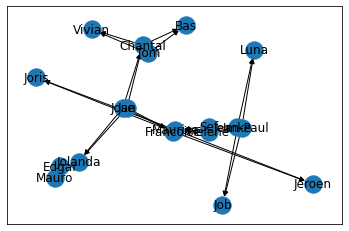

In [72]:
## Vraag 3
def rdf2nx(triples):   
    g = nx.DiGraph()

    for x in triples:
      g.add_node(x[0].split("/")[-1])

      #Maakt van een Relation een edge in het netwerk
      if x[1] == N.Relation:
        g.add_edges_from([(x[0].split("/")[-1]  ,x[2].split("/")[-1] )] )

      #Maakt van een NodeAttibute relatie een nx node attribute
      elif x[1] == N.NodeAttribute:
        g.nodes[(x[0].split("/")[-1])][str(x[2])]=True

    #berekent een lijst met alle attributes
    possibleAtr = G.nodes[node_list[0]]
    All_Atr = list(possibleAtr.keys())

    #geeft alle nodes voor elke attibute een False waarde als het geen True is
    for node in g.nodes():
      for atr in All_Atr:
        if atr not in g.nodes[node]:
          g.nodes[node][atr] = False
        
    return(g)

g = rdf2nx(H)
nx.draw_networkx(g)

Om te controlleren of alles correct is gegaan, kunnen we kijken of het netwerken na het transformeren van Networkx naar RDF, en weer terug van RDF naar Networkx nog hetzelfde is. Dit is het geval als alle relaties nog kloppen, en de netwerken dus isomorf zijn, en als de attributen kloppen. Voor ons familienetwerk staat hieronder een kleine test. Als alles klopt zal het 1, 2 en 3 uitprinten. Deze test alleen voor ons familienetwerk.

In [73]:
import networkx.algorithms.isomorphism as iso
if nx.is_isomorphic(g, G):
  print("1")

if nx.get_node_attributes(g,'V') == nx.get_node_attributes(G,'V'):
  print("2")

if nx.get_node_attributes(g,'M') == nx.get_node_attributes(G,'M'):
  print("3")

1
2
3
